# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection and preprocessing

In [2]:
#Loading the Dataset
car_dataset = pd.read_csv('car data.csv')
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [4]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print("-----------------------------")
print(car_dataset.Seller_Type.value_counts())
print("-----------------------------")
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
-----------------------------
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
-----------------------------
Manual       261
Automatic     40
Name: Transmission, dtype: int64


### Encoding the Categorical Data

In [7]:
# encoding "fuel" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "seller_type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [8]:
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


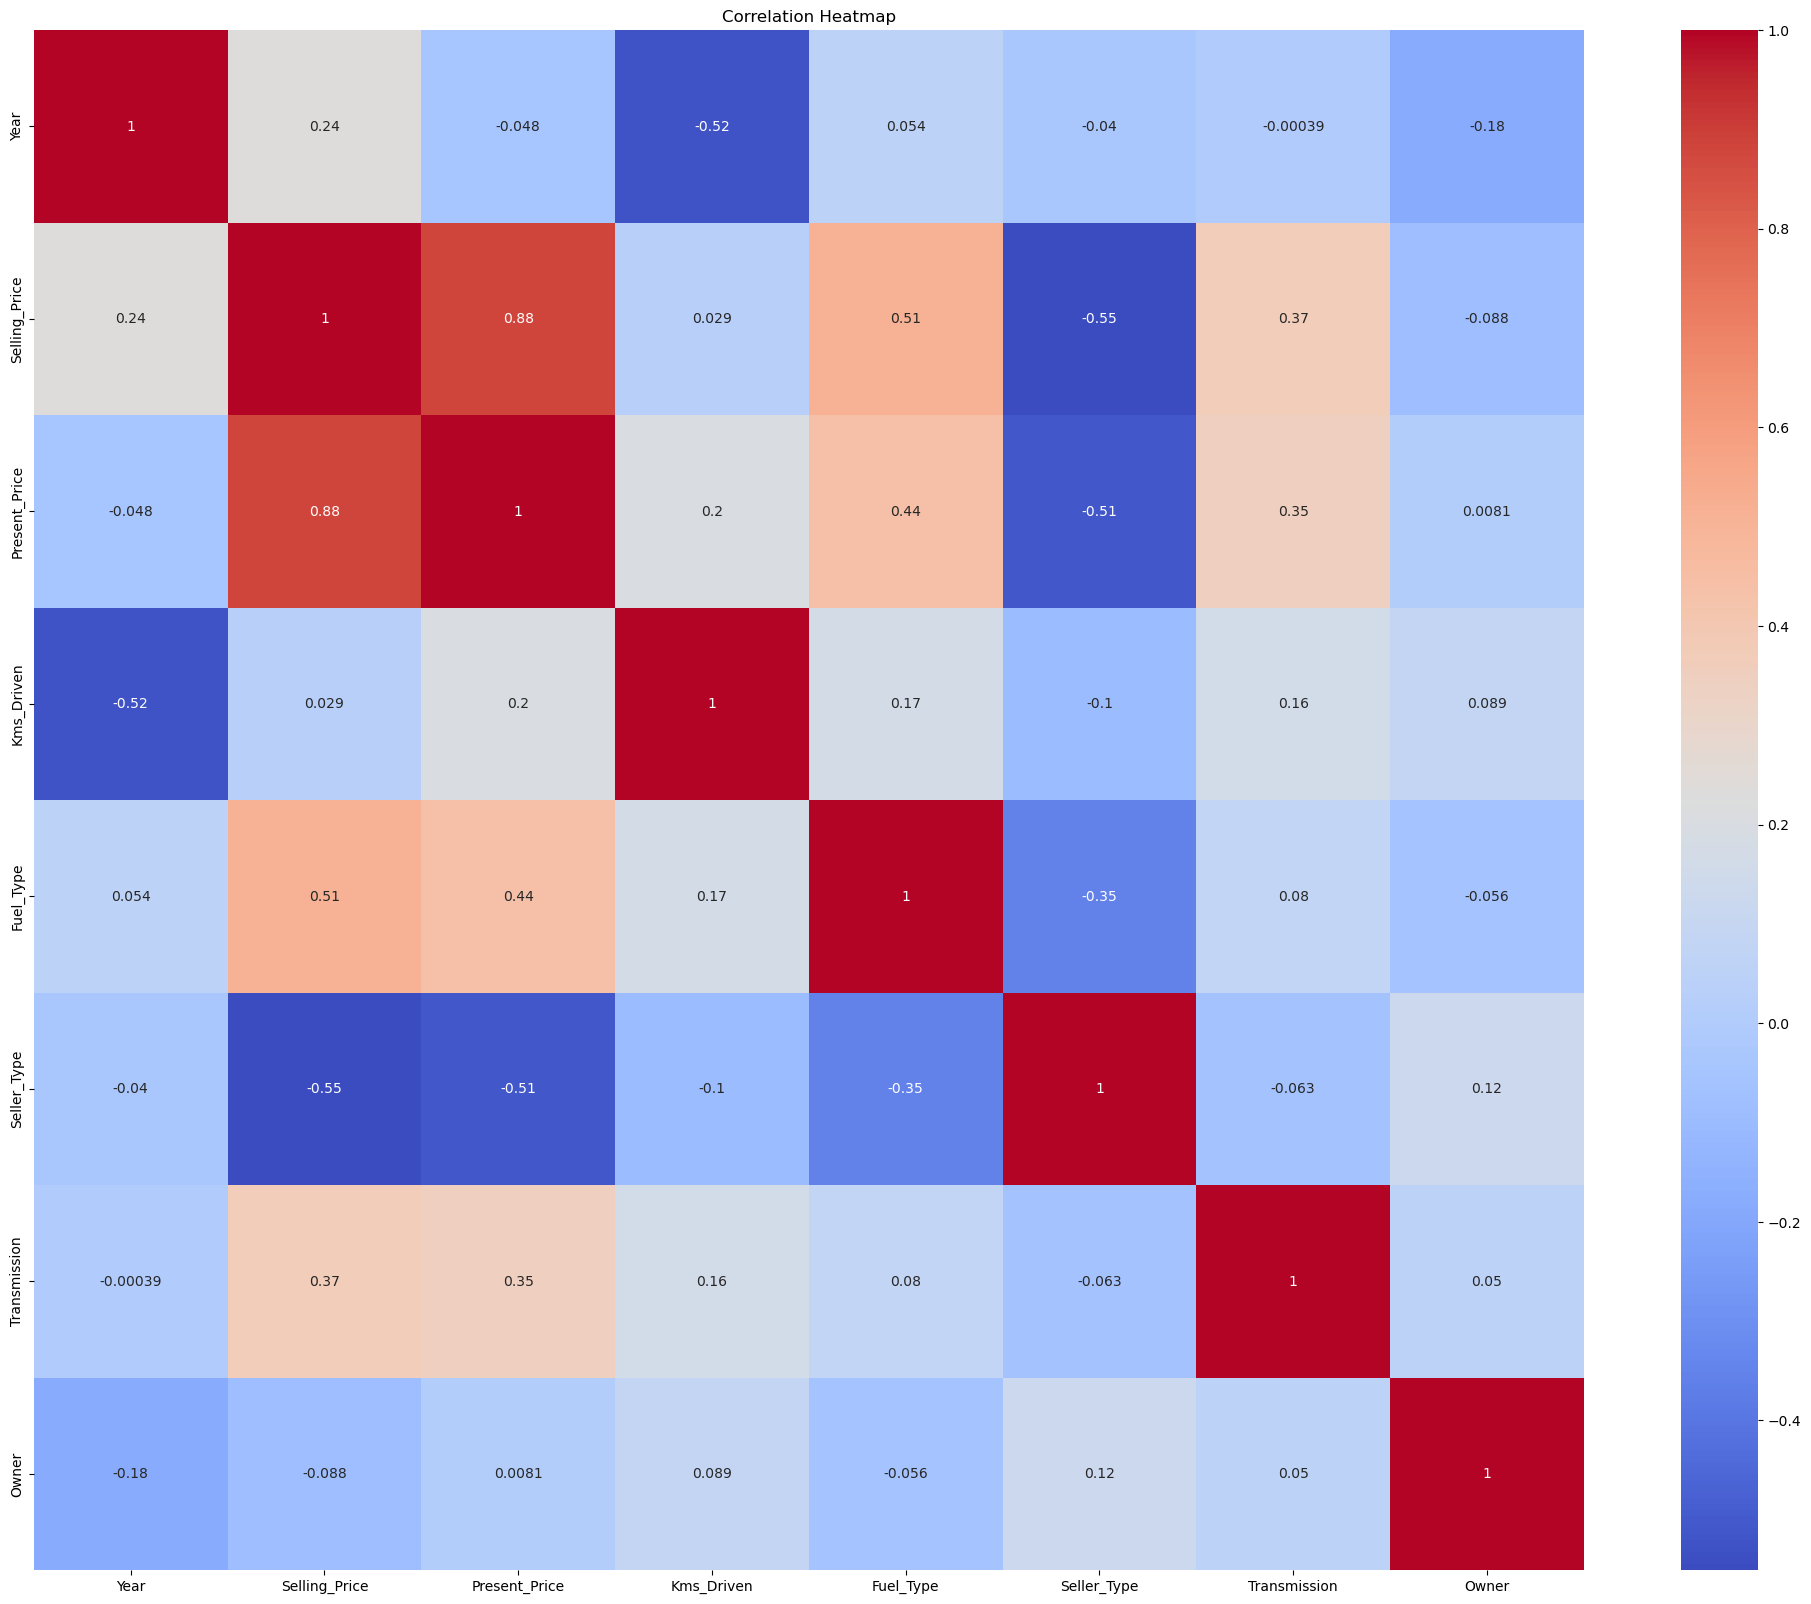

In [9]:
# Creating a correlation matrix to understand which independent columns correlate the
# most with the dependent / target variable

correlation_matrix = car_dataset.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Splitting the dataset

In [10]:
X = car_dataset.drop(['Car_Name','Selling_Price', 'Kms_Driven', 'Owner'], axis=1)
Y = car_dataset['Selling_Price']

# Splitting the data into : Train(80%)  & Test(20%)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

# Training the Model

In [12]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [13]:
# training the model
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

### Saving the Trained Model

In [14]:
import pickle
filename = 'CarPricePrediction_LinearRegression.train'
pickle.dump(lin_reg_model, open(filename,'wb'))
#loadMODEL = pickle.load(open('CarPricePrediction_LinearRegression.train','rb')) #loading the saved model

# Model Evaluation

In [15]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)


training_data_prediction

array([ 6.84628223e+00,  1.75185038e+00,  4.33346059e+00, -2.42967706e-01,
        3.47724518e+00,  2.87925361e+00,  1.35854261e+00,  3.12531323e-01,
        1.53278594e+00,  1.08559819e+00,  4.32629228e+00,  6.11447271e+00,
        1.08559819e+00,  4.99929327e-01,  6.15685193e+00,  3.26328051e+00,
        2.28757772e+00,  7.38346217e+00,  4.52369446e+00,  4.48753826e+00,
        4.83127922e+00,  2.82631891e+00,  4.40088924e+00,  1.79273301e+00,
        2.21549850e-01,  4.02057882e+00,  1.23347349e+00,  4.52369446e+00,
        1.35854261e+00,  7.19380434e+00,  7.27235903e+00,  6.37983010e+00,
        2.28757772e+00,  2.16620991e+01,  2.18133500e+00,  5.73189701e+00,
        2.77149364e+00,  7.65042569e+00,  8.21353887e+00,  9.98957457e+00,
        2.00163595e+00,  2.14856596e+00,  1.39414751e+00,  2.34389959e+00,
        1.00016266e+01,  1.97960037e+00,  7.42465120e-02,  5.24906037e+00,
        1.13684159e+01, -3.12286923e-01,  9.59957112e-01,  1.61661976e+00,
        5.36269338e+00,  

In [16]:
# prediction on Test data
test_data_prediction = lin_reg_model.predict(X_test)
test_data_prediction

array([ 1.01822503e+01,  6.15015207e-01,  4.30896248e+00,  4.84222868e+00,
        9.64405636e+00,  4.15299424e+00,  6.94045501e+00,  7.37521598e+00,
       -3.73760789e-03,  5.18506289e+00,  6.17719419e+00,  6.19151154e+00,
        1.87406030e+00,  7.73687659e+00,  1.90594870e+00,  1.59777271e+00,
        2.02763066e+00,  1.87599487e+00,  9.53710908e+00,  4.35756472e+00,
        1.29694301e+00,  9.24588957e+00,  1.42014222e+00,  9.59301224e+00,
        6.38410443e-01,  8.14205983e+00,  1.53278594e+00, -2.66953431e+00,
        4.22853648e+00,  1.78464007e+00,  3.26328051e+00,  3.76401892e+00,
        5.60192348e+00,  7.73687659e+00, -2.18898668e+00,  6.78844451e+00,
        8.18199718e+00,  5.86281583e+00,  6.17719419e+00,  6.32392695e+00,
        1.62461206e+01,  2.02763066e+00,  9.55624661e-01, -6.81490554e-01,
        7.04933686e+00,  6.84628223e+00,  1.03360878e+00,  6.78844451e+00,
        1.41950206e+01,  3.10454107e+00,  8.14205983e+00, -1.18933262e+00,
        8.97839948e+00,  

In [17]:
# # R squared Error
# error_score1 = metrics.r2_score(Y_train, training_data_prediction)
# print("R squared Error (Train Data) : ", error_score1*100,'%')
# error_score2 = metrics.r2_score(Y_test, test_data_prediction)
# print("R squared Error (Test Data) : ", error_score2*100,'%')

In [18]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R2 Score : ", error_score*100,'%')

R2 Score :  84.17091198770406 %


# Visualizing the actual and predicted prices

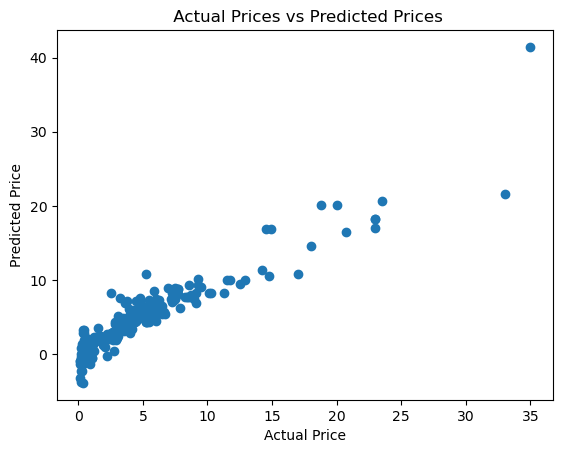

In [19]:
# on train data
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

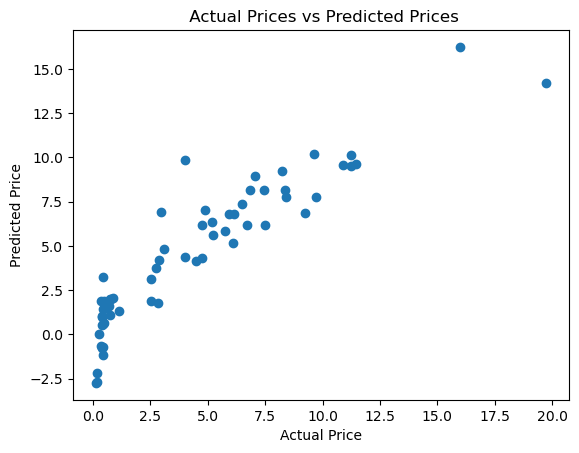

In [20]:
# on test data
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()